In [1]:
import math
import random
import time
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se define la forma de crear a la generación 0

In [2]:
tiempo_inicial = time.time()
individuos = 100
atributos = 5
puntos_totales=200
random.seed(5)
# Se Genera la matriz de 100 filas x 5 columnas para la primera generación
generacion_0 = [[random.randint(0,200) for _ in range(atributos)] for _ in range(individuos*20)]
#se hace la suma de los atributos
suma_por_fila = [sum(fila) for fila in generacion_0 ]
#se define la funcion que distribuye los valores de los atributos cuando no suman los puntos totales
def dividir_diferencia(numero):
    if numero < 0:
        numero_nuevo=-1*numero
        divisores = [random.randint(0,numero_nuevo) for _ in range(atributos-1)]
        quinto_atributo = numero_nuevo - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append(quinto_atributo)
        random.shuffle(divisores)
        divisores_negativos = [-1 * x for x in divisores]
        return divisores_negativos
    else:
        divisores = [random.randint(0,numero) for _ in range(atributos-1)]
        quinto_atributo = numero - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append( quinto_atributo)
        random.shuffle(divisores)
        return divisores
#------------------------------------------------------------------------------------------------------------
#se calcula la diferencia entre los puntos totales y la suma y se distribuye los valores
generacion_0_V2=copy.deepcopy(generacion_0)
for i in range(len(generacion_0_V2)):
    diferencia = puntos_totales - suma_por_fila[i]
    if diferencia != 0:
        distribucion = dividir_diferencia(diferencia)
        for j in range(atributos):
            generacion_0_V2[i][j] = generacion_0[i][j]+ distribucion[j]
#------------------------------------------------------------------------------------------------------------´
#Se filtra los individuos con los atributos positivos
generacion_0_V3 = [fila for fila in generacion_0_V2 if all(x >= 0 for x in fila)]
#Se disminuye la cantidad de filas hasta que sea igual a la cantidad de individuos
generacion_0_V4 = random.sample(generacion_0_V3,individuos)
#-------------------------------------------------------------------------------------------------------------
tiempo_final = time.time()
tiempo_transcurrido = tiempo_final - tiempo_inicial
print(f"Tiempo de ejecución: {tiempo_transcurrido} segundos")

suma_por_fila2 = [sum(fila) for fila in generacion_0_V4 ]
print(suma_por_fila2)

print(generacion_0_V4)

Tiempo de ejecución: 0.23984718322753906 segundos
[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
[[69, 126, 4, 0, 1], [47, 5, 126, 8, 14], [2, 2, 78, 57, 61], [38, 15, 66, 62, 19], [17, 18, 17, 116, 32], [11, 97, 23, 17, 52], [0, 4, 133, 33, 30], [60, 10, 78, 43, 9], [0, 3, 29, 22, 146], [8, 91, 43, 30, 28], [31, 76, 38, 29, 26], [9, 26, 117, 4, 44], [39, 93, 2, 2, 64], [29, 50, 6, 84, 31], [4, 59, 0, 127, 10], [49, 26, 40, 28, 57], [47, 75, 10, 45, 23], [131, 5, 16, 16, 32], [89, 21, 12, 69, 9], [25, 121, 37, 16, 1], [52, 17, 38, 51, 42], 

In [3]:
#se genera la columna con las alturas
nueva_columna = [random.randint(13,20) for _ in range(individuos)]
nueva_columna_V2= [valor / 10 for valor in nueva_columna]
print(nueva_columna_V2)
#se agrupa los datos
datos_iniciales = [[val] + row for val,row in zip(nueva_columna_V2,generacion_0_V4)]

[1.4, 1.9, 1.5, 2.0, 2.0, 1.9, 1.9, 1.4, 1.4, 2.0, 1.5, 1.7, 1.8, 1.6, 1.5, 1.4, 1.8, 2.0, 1.4, 1.4, 1.7, 2.0, 1.6, 2.0, 1.7, 1.8, 2.0, 2.0, 1.3, 1.3, 2.0, 1.8, 1.7, 1.9, 1.7, 1.3, 1.7, 1.3, 1.6, 1.4, 1.3, 2.0, 1.7, 1.4, 1.7, 1.3, 1.8, 1.8, 1.4, 1.3, 1.4, 1.8, 1.6, 1.6, 1.4, 1.8, 1.6, 1.8, 1.7, 2.0, 1.4, 1.5, 1.6, 1.4, 1.6, 2.0, 1.9, 1.6, 1.6, 2.0, 1.6, 1.3, 1.7, 1.5, 1.7, 1.9, 1.9, 1.8, 1.6, 1.7, 1.6, 1.8, 1.8, 1.4, 1.5, 1.8, 1.3, 1.9, 1.6, 1.6, 1.6, 1.5, 1.6, 1.9, 1.6, 1.9, 1.7, 2.0, 1.6, 1.3]


In [107]:
#se agrupa las dos celdas anteriores para crear una funcion que realize la creación a partir de los individuos y la semilla

def dividir_diferencia(numero):
    if numero < 0:
        numero_nuevo=-1*numero
        divisores = [random.randint(0,numero_nuevo) for _ in range(atributos-1)]
        quinto_atributo = numero_nuevo - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append(quinto_atributo)
        random.shuffle(divisores)
        divisores_negativos = [-1 * x for x in divisores]
        return divisores_negativos
    else:
        divisores = [random.randint(0,numero) for _ in range(atributos-1)]
        quinto_atributo = numero - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append( quinto_atributo)
        random.shuffle(divisores)
        return divisores


def crear_generacion_0(individuos,puntos_totales,semilla):
  atributos = 5
  random.seed(semilla)
  # Se Genera la matriz de 100 filas x 5 columnas para la primera generación
  generacion_0 = [[random.randint(0,200) for _ in range(atributos)] for _ in range(individuos*20)]
  #se hace la suma de los atributos
  suma_por_fila = [sum(fila) for fila in generacion_0 ]
  #se define la funcion que distribuye los valores de los atributos cuando no suman los puntos totales
  #------------------------------------------------------------------------------------------------------------
  #se calcula la diferencia entre los puntos totales y la suma y se distribuye los valores
  generacion_0_V2=copy.deepcopy(generacion_0)
  for i in range(len(generacion_0_V2)):
      diferencia = puntos_totales - suma_por_fila[i]
      if diferencia != 0:
          distribucion = dividir_diferencia(diferencia)
          for j in range(atributos):
              generacion_0_V2[i][j] = generacion_0[i][j]+ distribucion[j]
  #------------------------------------------------------------------------------------------------------------´
  #Se filtra los individuos con los atributos positivos
  generacion_0_V3 = [fila for fila in generacion_0_V2 if all(x >= 0 for x in fila)]
  #Se disminuye la cantidad de filas hasta que sea igual a la cantidad de individuos
  generacion_0_V4 = random.sample(generacion_0_V3,individuos)
  #-------------------------------------------------------------------------------------------------------------
  #se genera la columna con las alturas
  nueva_columna = [random.randint(13,20) for _ in range(individuos)]
  nueva_columna_V2= [valor / 10 for valor in nueva_columna]
  #se agrupa los datos
  datos_iniciales = [[val] + row for val,row in zip(nueva_columna_V2,generacion_0_V4)]
  return datos_iniciales

#se crea una funcion que revisa si una generacion de parametros tiene algun numero negativo o no suma los puntos totales
def verificar_generacion(parametros_generacion):
  suma_sin_la_altura = [sum(fila[1:]) for fila in parametros_generacion]
  filas_con_negativo = any(any(x < 0 for x in fila) for fila in parametros_generacion)
  if filas_con_negativo:
    print("La generación contiene al menos un parámetro negativo")
  if any(valor != puntos_totales for valor in suma_sin_la_altura):
    print("Los atributos no suman los puntos totales")
  return



# **Caso histogramas de la población inicial para guerrero**

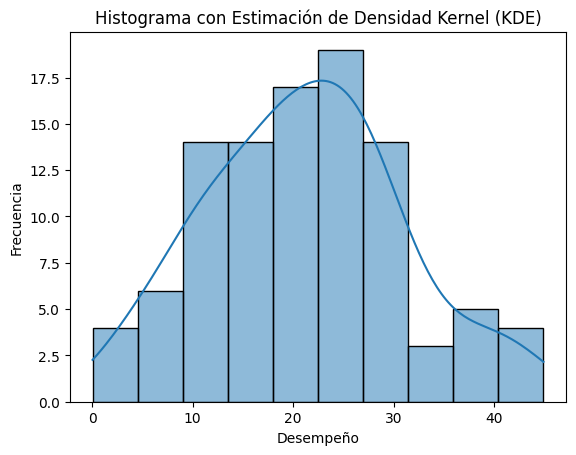

In [ ]:
def FO_caso_histogramas(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.6* ataque + 0.4 * defensa  #caso gerrero#
  return Desempeño

puntaje_inicial=np.zeros(individuos)
for i in range(individuos):
  puntaje_inicial[i]=FO_caso_histogramas(datos_iniciales[i])
#-------------------------------------------------------------------------------
#se crea el histograma
sns.histplot(puntaje_inicial, kde=True, bins=10)

# Añadir títulos y etiquetas
plt.title('Histograma con Estimación de Densidad Kernel (KDE)')
plt.xlabel('Desempeño')
plt.ylabel('Frecuencia')
# Mostrar el gráfico
plt.show()

# **Influencia mutación**

In [5]:
def FO_caso_mutacion(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.6* ataque + 0.4 * defensa  #caso gerrero#
  return Desempeño

# ***Se define las funciones para la mutación***

In [75]:
def mutacion_multigen(individuo_a_mutar):
#--------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[0]<2.0:
          numero=individuo_a_mutar[0]+0.1
          individuo_a_mutar[0]=round(numero, 1)
      if cambio==-1:
        if individuo_a_mutar[0]>1.3:
          numero=individuo_a_mutar[0]-0.1
          individuo_a_mutar[0]=round(numero, 1)
#--------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[1]!=puntos_totales and individuo_a_mutar[5]!=0:
          individuo_a_mutar[1]=individuo_a_mutar[1]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
      if cambio==-1:
        if individuo_a_mutar[1]!=0 and individuo_a_mutar[5]!=puntos_totales:
          individuo_a_mutar[1]=individuo_a_mutar[1]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[2]!=puntos_totales and individuo_a_mutar[3]!=0:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
      if cambio==-1:
        if individuo_a_mutar[2]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[3]!=puntos_totales and individuo_a_mutar[4]!=0:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
      if cambio==-1:
        if individuo_a_mutar[3]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[4]!=puntos_totales and individuo_a_mutar[2]!=0:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
      if cambio==-1:
        if individuo_a_mutar[4]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[5]!=puntos_totales and individuo_a_mutar[1]!=0:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
      if cambio==-1:
        if individuo_a_mutar[5]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
    return individuo_a_mutar
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
def mutacion_gen(individuo_a_mutar):
    if random.random() < Pmut:
      posición = random.randint(0, 5)
      cambio = random.choice([-1, 1])
#-----------------------------------------------------------
      if posición==0 and cambio==1:
        if individuo_a_mutar[posición]<2.0:
          numero=individuo_a_mutar[posición]+0.1
          individuo_a_mutar[posición]=round(numero, 1)
      if posición==0 and cambio==-1:
        if individuo_a_mutar[posición]>1.3:
          numero=individuo_a_mutar[posición]-0.1
          individuo_a_mutar[posición]=round(numero, 1)
#-----------------------------------------------------------
      if posición==1 and cambio==1:
        if individuo_a_mutar[1]!=puntos_totales and individuo_a_mutar[5]!=0:
          individuo_a_mutar[posición]=individuo_a_mutar[posición]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
      if posición==1 and cambio==-1:
        if individuo_a_mutar[posición]!=0 and individuo_a_mutar[5]!=puntos_totales:
          individuo_a_mutar[posición]=individuo_a_mutar[posición]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
#-----------------------------------------------------------
      if posición==2 and cambio==1:
        if individuo_a_mutar[2]!=puntos_totales and individuo_a_mutar[3]!=0:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
      if posición==2 and cambio==-1:
        if individuo_a_mutar[2]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
#-----------------------------------------------------------
      if posición==3 and cambio==1:
        if individuo_a_mutar[3]!=puntos_totales and individuo_a_mutar[4]!=0:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
      if posición==3 and cambio==-1:
        if individuo_a_mutar[3]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
#-------------------------------------------------------------
      if posición==4 and cambio==1:
        if individuo_a_mutar[4]!=puntos_totales and individuo_a_mutar[2]!=0:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
      if posición==4 and cambio==-1:
        if individuo_a_mutar[4]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
#-----------------------------------------------------------
      if posición==5 and cambio==1:
        if individuo_a_mutar[5]!=puntos_totales and individuo_a_mutar[1]!=0:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
      if posición==4 and cambio==-1:
        if individuo_a_mutar[5]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
    return individuo_a_mutar
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

# ***Se realiza los gráficos correspondientes***

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


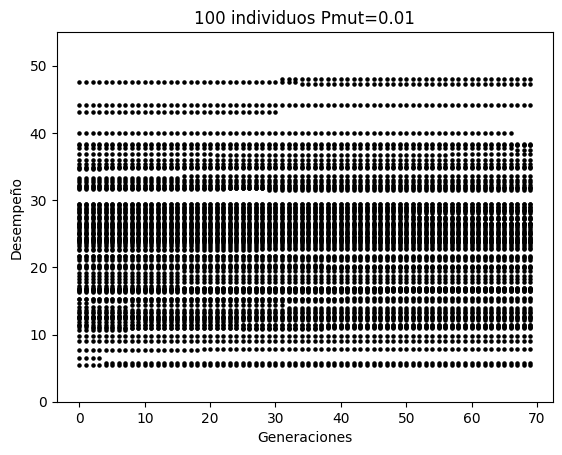

In [90]:
#realiza el analisis para la mutacion gen
individuos=100
puntos_totales=200
semilla=15
generaciones=70
#------------------------------------------------------------------------------
generacion_cero=crear_generacion_0(individuos,puntos_totales,semilla)
suma_atributos_generacion = [sum(fila[1:]) for fila in generacion_cero]
print(suma_atributos_generacion)
#se definen las funciones para la mutación
Pmut=0.01
generacion=copy.deepcopy(generacion_cero)
Desempeño_generacion_actual=np.zeros(individuos)

#se le aplica la mutación a la poblacion inicial
for j in range(generaciones):
  for i in range(individuos):
    generacion[i][:]=mutacion_gen(generacion[i][:])
    Desempeño_generacion_actual[i]=FO_caso_mutacion(generacion[i][:])
  vector = [j for _ in range(individuos)]
  plt.scatter(vector,Desempeño_generacion_actual,s=5, color='k')

plt.title('100 individuos Pmut=0.01')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')
plt.ylim(0, 55)
plt.show()

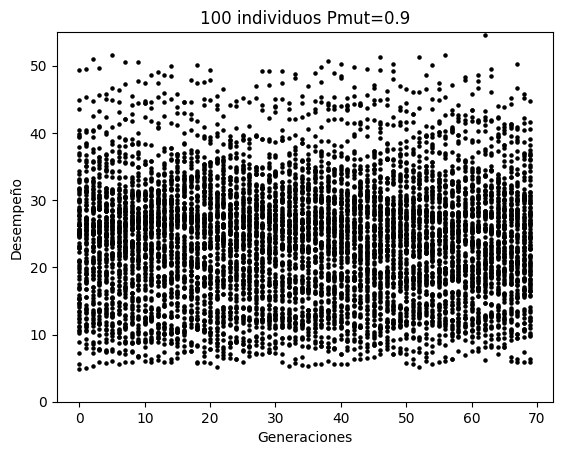

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


In [100]:
#se realiza el analisis para la mutacion gen
individuos=100
puntos_totales=200
semilla=15
generaciones=70
#------------------------------------------------------------------------------
generacion_cero=crear_generacion_0(individuos,puntos_totales,semilla)
#se definen las funciones para la mutación
Pmut=0.9
generacion=copy.deepcopy(generacion_cero)
Desempeño_generacion_actual=np.zeros(individuos)

#se le aplica la mutación a la poblacion inicial
for j in range(generaciones):
  for i in range(individuos):
    generacion[i][:]=mutacion_multigen(generacion[i][:])
    Desempeño_generacion_actual[i]=FO_caso_mutacion(generacion[i][:])
  vector = [j for _ in range(individuos)]
  plt.scatter(vector,Desempeño_generacion_actual,s=5, color='k')

plt.title('100 individuos Pmut=0.9')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')
plt.ylim(0, 55)
plt.show()
suma_atributos_generacion = [sum(fila[1:]) for fila in generacion]
print(suma_atributos_generacion)

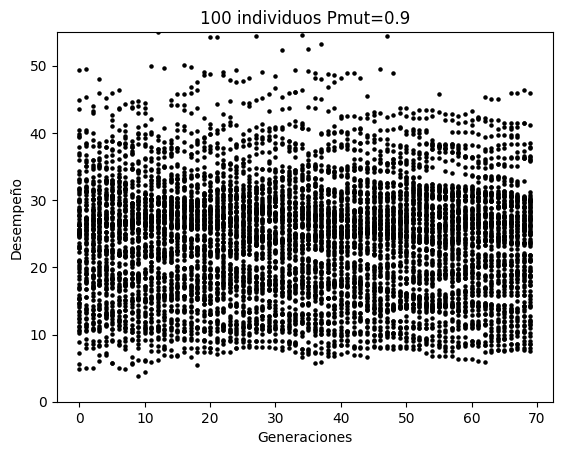

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


In [ ]:
#se realiza el analisis para la mutacion no uniforme, multigen
individuos=100
puntos_totales=200
semilla=15
generaciones=70
#------------------------------------------------------------------------------
generacion_cero=crear_generacion_0(individuos,puntos_totales,semilla)
#se definen las funciones para la mutación
Pmut_inicial=0.9
Pmut=Pmut_inicial
generacion=copy.deepcopy(generacion_cero)
Desempeño_generacion_actual=np.zeros(individuos)

#se le aplica la mutación a la poblacion inicial
for j in range(generaciones):
  for i in range(individuos):
    generacion[i][:]=mutacion_multigen(generacion[i][:])
    Desempeño_generacion_actual[i]=FO_caso_mutacion(generacion[i][:])
  vector = [j for _ in range(individuos)]
  plt.scatter(vector,Desempeño_generacion_actual,s=5, color='k')
  Pmut=Pmut_inicial*np.exp(-j /20)



plt.title('100 individuos Pmut=0.9')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')
plt.ylim(0, 55)
plt.show()
suma_atributos_generacion = [sum(fila[1:]) for fila in generacion]
print(suma_atributos_generacion)

Text(0, 0.5, 'Pmut')

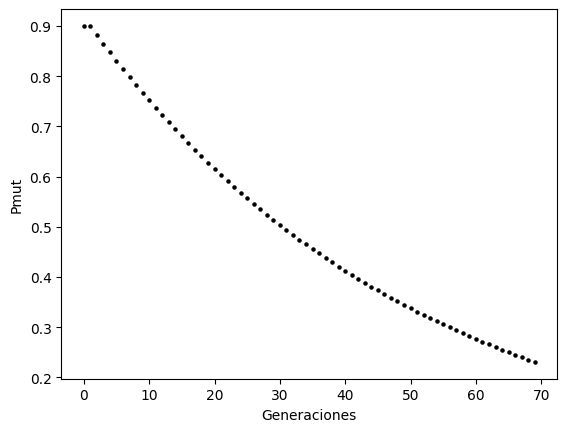

In [ ]:
for j in range(generaciones):
  plt.scatter(j,Pmut,s=5, color='k')
  Pmut=Pmut_inicial*np.exp(-(j) /50)
  plt.xlabel('Generaciones')
plt.ylabel('Pmut')

# Se realiza el muestreo, se define las funciones

In [64]:
#se define las funciones
def muestreo_elite(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  pares = list(zip(Desempeño_a_muestrear, generacion_a_muestrear))
  pares_ordenados = sorted(pares, key=lambda x: x[0], reverse=True)
  generacion_ordenada = [fila for _, fila in pares_ordenados]
  individuos_elite = generacion_ordenada[:cantidad]
  return individuos_elite
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_ruleta(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se suma las aptitudes, se obtiene las aptitudes relativas y la aptitud acomulada
  suma_aptitudes = np.sum(Desempeño_a_muestrear)
  aptitud_relativa = Desempeño_a_muestrear / suma_aptitudes
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_universal(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se suma las aptitudes, se obtiene las aptitudes relativas y la aptitud acomulada
  suma_aptitudes = np.sum(Desempeño_a_muestrear)
  aptitud_relativa = Desempeño_a_muestrear / suma_aptitudes
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se genera el numero aleatorio para la ruleta y se calcula el rango
  r = np.random.rand()  # Número aleatorio entre 0 y 1
  rangos = [r + j /cantidad  for j in range(cantidad)]
  #se selecciona los individuos
  indices_seleccionados = []
  for rango in rangos:
      indice = np.searchsorted(aptitud_acumulada,rango % 1)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_Boltzmann(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  Temperatura_inicial=50
  Temperatura=Temperatura_inicial*np.exp(-(iteraciones) /50)
  #se calcula el promedio del desempeño
  promedio_desempeño = np.mean(Desempeño_a_muestrear)
  # se Calcula la pseudo-aptitud
  pseudo_aptitud = np.exp(Desempeño_a_muestrear /Temperatura)
  # se normaliza
  suma_pseudo_aptitud = np.sum(pseudo_aptitud)
  aptitud_relativa = pseudo_aptitud / suma_pseudo_aptitud
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_Ranking(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se calcula N y la pseudo_aptitud
  N = len(Desempeño_a_muestrear)
  ranking = np.argsort(np.argsort(-Desempeño_a_muestrear)) + 1
  pseudo_aptitud = (N - ranking + 1) / N
  #se normaliza
  suma_pseudo_aptitud = np.sum(pseudo_aptitud)
  aptitud_relativa = pseudo_aptitud / suma_pseudo_aptitud
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def torneo_deterministico(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):

  indices_aleatorios = [random.randint(0, len(generacion_a_muestrear) - 1) for _ in range(cantidad*2)]
  indices_seleccionados = []
  for i in range(cantidad):
    competidor_1 = Desempeño_a_muestrear[indices_aleatorios[i]]
    competidor_2 = Desempeño_a_muestrear[indices_aleatorios[i*2+1]]
    if competidor_1 > competidor_2:
      indices_seleccionados.append(indices_aleatorios[i])
    else:
      indices_seleccionados.append(indices_aleatorios[i*2+1])
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def torneo_probabilistico(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  Threshold=0.8
  indices_aleatorios = [random.randint(0, len(generacion_a_muestrear) - 1) for _ in range(cantidad*2)]
  indices_seleccionados = []

  for i in range(cantidad):
    r = np.random.rand()
    competidor_1 = Desempeño_a_muestrear[indices_aleatorios[i]]
    competidor_2 = Desempeño_a_muestrear[indices_aleatorios[i*2+1]]

    if r < Threshold:
      if competidor_1 > competidor_2:
        indices_seleccionados.append(indices_aleatorios[i])
      else:
        indices_seleccionados.append(indices_aleatorios[i*2+1])
    else:
      if competidor_1 > competidor_2:
        indices_seleccionados.append(indices_aleatorios[i*2+1])
      else:
        indices_seleccionados.append(indices_aleatorios[i])
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados

# **Se realiza los gráficos para el muestreo**

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


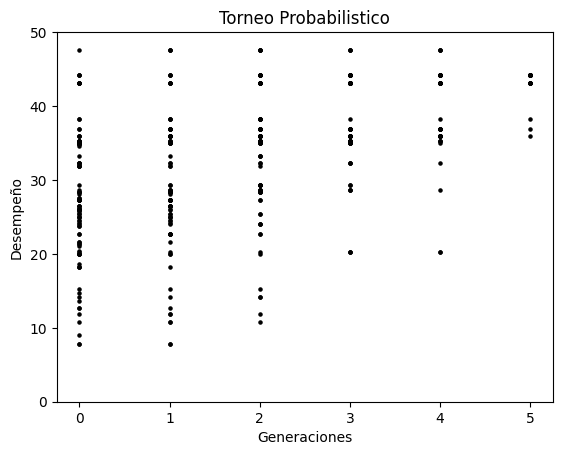

In [66]:
individuos=100
puntos_totales=200
semilla=15
generaciones=20
#------------------------------------------------------------------------------
generacion_cero=crear_generacion_0(individuos,puntos_totales,semilla)
suma_atributos_generacion = [sum(fila[1:]) for fila in generacion_cero]
print(suma_atributos_generacion)
generacion=copy.deepcopy(generacion_cero)
Desempeño_generacion_actual=np.zeros(individuos)
#se le aplica la mutación a la poblacion inicial

for j in range(generaciones):

  Desempeño_generacion_actual=np.zeros(len(generacion))

  for i in range(len(generacion)):
    Desempeño_generacion_actual[i]=FO_caso_mutacion(generacion[i][:])
  iteraciones=j
  generacion=torneo_probabilistico(generacion,Desempeño_generacion_actual,len(generacion)-j*5)

  Desempeño_muestreo=np.zeros(len(generacion))
  for q in range(len(generacion)):
    Desempeño_muestreo[q]=FO_caso_mutacion(generacion[q][:])

  vector = [j for _ in range(len(generacion))]
  plt.scatter(vector,Desempeño_muestreo,s=5, color='k')

plt.title('Torneo Probabilistico')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')
plt.ylim(0, 50)
plt.show()

# **Se realiza el crossover**

In [289]:
def dividir_diferencia_cross(numero):
        divisores = [random.randint(0,numero) for _ in range(5-1)]
        quinto_atributo = numero - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append( quinto_atributo)
        random.shuffle(divisores)
        return divisores
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_un_punto(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    suma_atributos_hijo_1=sum(hijo1[1:])
    suma_atributo_hijo_2 =sum(hijo2[1:])
    diferencia1=puntos_totales-suma_atributos_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2
    if diferencia1<0 or diferencia2<0:
      hijo1=padre1
      hijo2=padre2

    else:
      divisores1=dividir_diferencia_cross(diferencia1)
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo1[1:]=hijo1[1:]+divisores1
      hijo2[1:]=hijo2[1:]+divisores2
    return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_dos_puntos(padre1, padre2):
    punto_cruce1 = random.randint(1, len(padre1) -2)
    punto_cruce2 = random.randint(punto_cruce1 + 1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce1] + padre2[punto_cruce1:punto_cruce2] + padre1[punto_cruce2:]
    hijo2 = padre2[:punto_cruce1] + padre1[punto_cruce1:punto_cruce2] + padre2[punto_cruce2:]
    suma_atributos_hijo_1=sum(hijo1[1:])
    suma_atributo_hijo_2 =sum(hijo2[1:])
    diferencia1=puntos_totales-suma_atributos_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2

    if diferencia1<0:
      hijo1=padre1
    if diferencia2<0:
      hijo2=padre2

    if diferencia1 >=0:
      divisores1=dividir_diferencia_cross(diferencia1)
      hijo1[1:]=hijo1[1:]+divisores1
    if diferencia2 >=0:
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo2[1:]=hijo2[1:]+divisores2

    return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_anular(padre1, padre2):     #no funciona

  longitud = len(padre1)
  punto_cruce = np.random.randint(1, longitud)
  longitud_segmento = np.random.randint(1, (longitud // 2) + 1)
  punto_final = (punto_cruce + longitud_segmento) % longitud +1

  if punto_cruce < punto_final:
      segmento_padre1 = padre1[punto_cruce:punto_final]
      segmento_padre2 = padre2[punto_cruce:punto_final]

      hijo1 = padre1[:punto_cruce] + segmento_padre2 + padre1[punto_final:]
      hijo2 = padre2[:punto_cruce] + segmento_padre1 + padre2[punto_final:]
  else:
      segmento_padre1 = padre1[punto_cruce:] + padre1[:punto_final+1]
      segmento_padre2 = padre2[punto_cruce:] + padre2[:punto_final+1]

      hijo1 =  padre1[:punto_final] + segmento_padre2 + padre1[punto_cruce:]
      hijo2 =  padre2[:punto_final] + segmento_padre1 + padre2[punto_cruce:]

  suma_atributos_hijo_1=sum(hijo1[1:])
  suma_atributo_hijo_2 =sum(hijo2[1:])
  diferencia1=puntos_totales-suma_atributos_hijo_1
  diferencia2=puntos_totales-suma_atributo_hijo_2

  if diferencia1<0:
    hijo1=padre1
  if diferencia2<0:
    hijo2=padre2
  if diferencia1 >=0:
    divisores1=dividir_diferencia_cross(diferencia1)
    hijo1[1:] = [a + b for a, b in zip(hijo1[1:], divisores1)]
  if diferencia2 >=0:
    divisores2=dividir_diferencia_cross(diferencia2)
    hijo2[1:] = [a + b for a, b in zip(hijo2[1:], divisores2)]

  return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_uniforme(padre1, padre2):

    hijo1_candidato = copy.deepcopy(padre1)
    hijo2_candidato = copy.deepcopy(padre2)

    if random.random() < 0.5:
      hijo1_candidato[0] = padre2[0]
      hijo2_candidato[0] = padre1[0]
    if random.random() < 0.5:
      hijo1_candidato[1] = padre2[1]
      hijo2_candidato[1] = padre1[1]
    if random.random() < 0.5:
      hijo1_candidato[2] = padre2[2]
      hijo2_candidato[2] = padre1[2]
    if random.random() < 0.5:
      hijo1_candidato[3] = padre2[3]
      hijo2_candidato[3] = padre1[3]
    if random.random() < 0.5:
      hijo1_candidato[4] = padre2[4]
      hijo2_candidato[4] = padre1[4]
    if random.random() < 0.5:
      hijo1_candidato[5] = padre2[5]
      hijo2_candidato[5] = padre1[5]


    suma_atributo_hijo_1=sum(hijo1_candidato[1:])
    suma_atributo_hijo_2 =sum(hijo2_candidato[1:])
    diferencia1=puntos_totales-suma_atributo_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2

    if diferencia1<0:
      hijo1=padre1
    if diferencia2<0:
      hijo2=padre2

    if diferencia1 >=0:
      hijo1=copy.deepcopy(hijo1_candidato)
      divisores1=dividir_diferencia_cross(diferencia1)
      hijo1[1:] = [a + b for a, b in zip(hijo1_candidato[1:], divisores1)]



    if diferencia2 >=0:
      hijo2=copy.deepcopy(hijo2_candidato)
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo2[1:] = [a + b for a, b in zip(hijo2_candidato[1:], divisores2)]

    return hijo1, hijo2



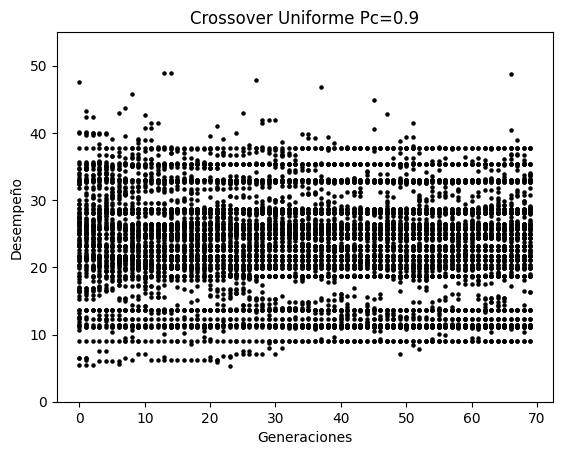

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


In [305]:
#se realiza el analisis para el crossover
individuos=100
puntos_totales=200
semilla=15
generaciones=70
#------------------------------------------------------------------------------
generacion_cero=crear_generacion_0(individuos,puntos_totales,semilla)

Pc=0.9
generacion=copy.deepcopy(generacion_cero)
Desempeño_generacion_actual=np.zeros(individuos)


for j in range(generaciones):

  for i in range(individuos//2):

    if random.random() < Pc:
      generacion[i][:],generacion[i*2+1][:]=crossover_uniforme(generacion[i][:],generacion[(individuos//2)+i][:])

  for i in range(individuos):
    Desempeño_generacion_actual[i]=FO_caso_mutacion(generacion[i][:])

  vector = [j for _ in range(individuos)]
  plt.scatter(vector,Desempeño_generacion_actual,s=5, color='k')




plt.title('Crossover Uniforme Pc=0.9')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')
plt.ylim(0, 55)
plt.show()
suma_atributos_generacion = [sum(fila[1:]) for fila in generacion]
print(suma_atributos_generacion)

# **Se define todas las funciones, ejecutar esta celda para cargar tanto librerias como funciones**

In [293]:
import math
import random
import time
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
def FO_guerrero(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.6* ataque + 0.4 * defensa  #caso gerrero#
  return Desempeño


def FO_arquero(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.9* ataque + 0.1 * defensa
  return Desempeño

def FO_guardian(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.1* ataque + 0.9 * defensa
  return Desempeño

def FO_mago(A):
  h=A[0]
  fuerza=A[1]
  destreza=A[2]
  inteligencia=A[3]
  vigor=A[4]
  constitucion=A[5]
#------------------------------------
  Ft=100* math.tanh(0.01*fuerza)
  Dt=math.tanh(0.01*destreza)
  It=0.6* math.tanh(0.01*inteligencia)
  Vt=math.tanh(0.01*vigor)
  Ct=100* math.tanh(0.01*constitucion)
#-------------------------------------
  ATM=0.5-((3*h-5)**4)+((3*h-5)**2)+ h*0.5
  DEM=2+((3*h-5)**4)-((3*h-5)**2)-h/2
  ataque=(Dt+It)*Ft*ATM
  defensa=(Vt+It)*Ct*DEM
  Desempeño= 0.8* ataque + 0.3 * defensa
  return Desempeño

In [295]:
def dividir_diferencia(numero):
    if numero < 0:
        numero_nuevo=-1*numero
        divisores = [random.randint(0,numero_nuevo) for _ in range(atributos-1)]
        quinto_atributo = numero_nuevo - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append(quinto_atributo)
        random.shuffle(divisores)
        divisores_negativos = [-1 * x for x in divisores]
        return divisores_negativos
    else:
        divisores = [random.randint(0,numero) for _ in range(atributos-1)]
        quinto_atributo = numero - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append( quinto_atributo)
        random.shuffle(divisores)
        return divisores


def crear_generacion_0(individuos,puntos_totales,semilla):
  atributos = 5
  random.seed(semilla)
  # Se Genera la matriz de 100 filas x 5 columnas para la primera generación
  generacion_0 = [[random.randint(0,200) for _ in range(atributos)] for _ in range(individuos*20)]
  #se hace la suma de los atributos
  suma_por_fila = [sum(fila) for fila in generacion_0 ]
  #se define la funcion que distribuye los valores de los atributos cuando no suman los puntos totales
  #------------------------------------------------------------------------------------------------------------
  #se calcula la diferencia entre los puntos totales y la suma y se distribuye los valores
  generacion_0_V2=copy.deepcopy(generacion_0)
  for i in range(len(generacion_0_V2)):
      diferencia = puntos_totales - suma_por_fila[i]
      if diferencia != 0:
          distribucion = dividir_diferencia(diferencia)
          for j in range(atributos):
              generacion_0_V2[i][j] = generacion_0[i][j]+ distribucion[j]
  #------------------------------------------------------------------------------------------------------------´
  #Se filtra los individuos con los atributos positivos
  generacion_0_V3 = [fila for fila in generacion_0_V2 if all(x >= 0 for x in fila)]
  #Se disminuye la cantidad de filas hasta que sea igual a la cantidad de individuos
  generacion_0_V4 = random.sample(generacion_0_V3,individuos)
  #-------------------------------------------------------------------------------------------------------------
  #se genera la columna con las alturas
  nueva_columna = [random.randint(13,20) for _ in range(individuos)]
  nueva_columna_V2= [valor / 10 for valor in nueva_columna]
  #se agrupa los datos
  datos_iniciales = [[val] + row for val,row in zip(nueva_columna_V2,generacion_0_V4)]
  return datos_iniciales

#se crea una funcion que revisa si una generacion de parametros tiene algun numero negativo o no suma los puntos totales
def verificar_generacion(parametros_generacion):
  suma_sin_la_altura = [sum(fila[1:]) for fila in parametros_generacion]
  filas_con_negativo = any(any(x < 0 for x in fila) for fila in parametros_generacion)
  if filas_con_negativo:
    print("La generación contiene al menos un parámetro negativo")
  if any(valor != puntos_totales for valor in suma_sin_la_altura):
    print("Los atributos no suman los puntos totales")
  return



In [296]:
def mutacion_multigen(individuo_a_mutar):
#--------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[0]<2.0:
          numero=individuo_a_mutar[0]+0.1
          individuo_a_mutar[0]=round(numero, 1)
      if cambio==-1:
        if individuo_a_mutar[0]>1.3:
          numero=individuo_a_mutar[0]-0.1
          individuo_a_mutar[0]=round(numero, 1)
#--------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[1]!=puntos_totales and individuo_a_mutar[5]!=0:
          individuo_a_mutar[1]=individuo_a_mutar[1]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
      if cambio==-1:
        if individuo_a_mutar[1]!=0 and individuo_a_mutar[5]!=puntos_totales:
          individuo_a_mutar[1]=individuo_a_mutar[1]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[2]!=puntos_totales and individuo_a_mutar[3]!=0:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
      if cambio==-1:
        if individuo_a_mutar[2]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[3]!=puntos_totales and individuo_a_mutar[4]!=0:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
      if cambio==-1:
        if individuo_a_mutar[3]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[4]!=puntos_totales and individuo_a_mutar[2]!=0:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
      if cambio==-1:
        if individuo_a_mutar[4]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
#--------------------------------------------------------------------------------------
    if random.random() < Pmut:
      cambio = random.choice([-1, 1])
      if cambio==1:
        if individuo_a_mutar[5]!=puntos_totales and individuo_a_mutar[1]!=0:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
      if cambio==-1:
        if individuo_a_mutar[5]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
    return individuo_a_mutar
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
def mutacion_gen(individuo_a_mutar):
    if random.random() < Pmut:
      posición = random.randint(0, 5)
      cambio = random.choice([-1, 1])
#-----------------------------------------------------------
      if posición==0 and cambio==1:
        if individuo_a_mutar[posición]<2.0:
          numero=individuo_a_mutar[posición]+0.1
          individuo_a_mutar[posición]=round(numero, 1)
      if posición==0 and cambio==-1:
        if individuo_a_mutar[posición]>1.3:
          numero=individuo_a_mutar[posición]-0.1
          individuo_a_mutar[posición]=round(numero, 1)
#-----------------------------------------------------------
      if posición==1 and cambio==1:
        if individuo_a_mutar[1]!=puntos_totales and individuo_a_mutar[5]!=0:
          individuo_a_mutar[posición]=individuo_a_mutar[posición]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
      if posición==1 and cambio==-1:
        if individuo_a_mutar[posición]!=0 and individuo_a_mutar[5]!=puntos_totales:
          individuo_a_mutar[posición]=individuo_a_mutar[posición]+cambio
          individuo_a_mutar[5]=individuo_a_mutar[5]-cambio
#-----------------------------------------------------------
      if posición==2 and cambio==1:
        if individuo_a_mutar[2]!=puntos_totales and individuo_a_mutar[3]!=0:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
      if posición==2 and cambio==-1:
        if individuo_a_mutar[2]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[2]=individuo_a_mutar[2]+cambio
          individuo_a_mutar[3]=individuo_a_mutar[3]-cambio
#-----------------------------------------------------------
      if posición==3 and cambio==1:
        if individuo_a_mutar[3]!=puntos_totales and individuo_a_mutar[4]!=0:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
      if posición==3 and cambio==-1:
        if individuo_a_mutar[3]!=0 and individuo_a_mutar[3]!=puntos_totales:
          individuo_a_mutar[3]=individuo_a_mutar[3]+cambio
          individuo_a_mutar[4]=individuo_a_mutar[4]-cambio
#-------------------------------------------------------------
      if posición==4 and cambio==1:
        if individuo_a_mutar[4]!=puntos_totales and individuo_a_mutar[2]!=0:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
      if posición==4 and cambio==-1:
        if individuo_a_mutar[4]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[4]=individuo_a_mutar[4]+cambio
          individuo_a_mutar[2]=individuo_a_mutar[2]-cambio
#-----------------------------------------------------------
      if posición==5 and cambio==1:
        if individuo_a_mutar[5]!=puntos_totales and individuo_a_mutar[1]!=0:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
      if posición==4 and cambio==-1:
        if individuo_a_mutar[5]!=0 and individuo_a_mutar[2]!=puntos_totales:
          individuo_a_mutar[5]=individuo_a_mutar[5]+cambio
          individuo_a_mutar[1]=individuo_a_mutar[1]-cambio
    return individuo_a_mutar
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

In [406]:
#se define las funciones
def muestreo_elite(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  pares = list(zip(Desempeño_a_muestrear, generacion_a_muestrear))
  pares_ordenados = sorted(pares, key=lambda x: x[0], reverse=True)
  generacion_ordenada = [fila for _, fila in pares_ordenados]
  individuos_elite = generacion_ordenada[:cantidad]
  return individuos_elite
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_ruleta(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se suma las aptitudes, se obtiene las aptitudes relativas y la aptitud acomulada
  suma_aptitudes = np.sum(Desempeño_a_muestrear)
  aptitud_relativa = Desempeño_a_muestrear / suma_aptitudes
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_universal(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se suma las aptitudes, se obtiene las aptitudes relativas y la aptitud acomulada
  suma_aptitudes = np.sum(Desempeño_a_muestrear)
  aptitud_relativa = Desempeño_a_muestrear / suma_aptitudes
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se genera el numero aleatorio para la ruleta y se calcula el rango
  r = np.random.rand()  # Número aleatorio entre 0 y 1
  rangos = [r + j /cantidad  for j in range(cantidad)]
  #se selecciona los individuos
  indices_seleccionados = []
  for rango in rangos:
      indice = np.searchsorted(aptitud_acumulada,rango % 1)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_Boltzmann(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  Temperatura_inicial=50
  Temperatura=Temperatura_inicial*np.exp(-(iteraciones) /50)
  #se calcula el promedio del desempeño
  promedio_desempeño = np.mean(Desempeño_a_muestrear)
  # se Calcula la pseudo-aptitud
  pseudo_aptitud = np.exp(Desempeño_a_muestrear /Temperatura)
  # se normaliza
  suma_pseudo_aptitud = np.sum(pseudo_aptitud)
  aptitud_relativa = pseudo_aptitud / suma_pseudo_aptitud
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def muestreo_Ranking(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  #se calcula N y la pseudo_aptitud
  N = len(Desempeño_a_muestrear)
  ranking = np.argsort(np.argsort(-Desempeño_a_muestrear)) + 1
  pseudo_aptitud = (N - ranking + 1) / N
  #se normaliza
  suma_pseudo_aptitud = np.sum(pseudo_aptitud)
  aptitud_relativa = pseudo_aptitud / suma_pseudo_aptitud
  aptitud_acumulada = np.cumsum(aptitud_relativa)
  #se selecciona los individuos
  indices_seleccionados = []
  for _ in range(cantidad):
      r = np.random.rand()
      indice = np.searchsorted(aptitud_acumulada, r)
      indices_seleccionados.append(indice)
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def torneo_deterministico(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):

  indices_aleatorios = [random.randint(0, len(generacion_a_muestrear) - 1) for _ in range(cantidad*2)]
  indices_seleccionados = []
  for i in range(cantidad):
    competidor_1 = Desempeño_a_muestrear[indices_aleatorios[i]]
    competidor_2 = Desempeño_a_muestrear[indices_aleatorios[i*2+1]]
    if competidor_1 > competidor_2:
      indices_seleccionados.append(indices_aleatorios[i])
    else:
      indices_seleccionados.append(indices_aleatorios[i*2+1])
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def torneo_probabilistico(generacion_a_muestrear,Desempeño_a_muestrear, cantidad):
  Threshold=0.8
  indices_aleatorios = [random.randint(0, len(generacion_a_muestrear) - 1) for _ in range(cantidad*2)]
  indices_seleccionados = []

  for i in range(cantidad):
    r = np.random.rand()
    competidor_1 = Desempeño_a_muestrear[indices_aleatorios[i]]
    competidor_2 = Desempeño_a_muestrear[indices_aleatorios[i*2+1]]

    if r < Threshold:
      if competidor_1 > competidor_2:
        indices_seleccionados.append(indices_aleatorios[i])
      else:
        indices_seleccionados.append(indices_aleatorios[i*2+1])
    else:
      if competidor_1 > competidor_2:
        indices_seleccionados.append(indices_aleatorios[i*2+1])
      else:
        indices_seleccionados.append(indices_aleatorios[i])
  individuos_seleccionados = [generacion_a_muestrear[i] for i in indices_seleccionados]
  return individuos_seleccionados

In [341]:
def dividir_diferencia_cross(numero):
        divisores = [random.randint(0,numero) for _ in range(5-1)]
        quinto_atributo = numero - sum(divisores)
        if  quinto_atributo < 0:
          return dividir_diferencia(numero)
        divisores.append( quinto_atributo)
        random.shuffle(divisores)
        return divisores
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_un_punto(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    suma_atributos_hijo_1=sum(hijo1[1:])
    suma_atributo_hijo_2 =sum(hijo2[1:])
    diferencia1=puntos_totales-suma_atributos_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2
    if diferencia1<0 or diferencia2<0:
      hijo1=padre1
      hijo2=padre2

    else:
      divisores1=dividir_diferencia_cross(diferencia1)
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo1[1:]=hijo1[1:]+divisores1
      hijo2[1:]=hijo2[1:]+divisores2
    return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_dos_puntos(padre1, padre2):
    punto_cruce1 = random.randint(1, len(padre1) -2)
    punto_cruce2 = random.randint(punto_cruce1 + 1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce1] + padre2[punto_cruce1:punto_cruce2] + padre1[punto_cruce2:]
    hijo2 = padre2[:punto_cruce1] + padre1[punto_cruce1:punto_cruce2] + padre2[punto_cruce2:]
    suma_atributos_hijo_1=sum(hijo1[1:])
    suma_atributo_hijo_2 =sum(hijo2[1:])
    diferencia1=puntos_totales-suma_atributos_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2

    if diferencia1<0:
      hijo1=padre1
    if diferencia2<0:
      hijo2=padre2

    if diferencia1 >=0:
      divisores1=dividir_diferencia_cross(diferencia1)
      hijo1[1:]=hijo1[1:]+divisores1
    if diferencia2 >=0:
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo2[1:]=hijo2[1:]+divisores2

    return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_anular(padre1, padre2):     #no funciona

  longitud = len(padre1)
  punto_cruce = np.random.randint(1, longitud)
  longitud_segmento = np.random.randint(1, (longitud // 2) + 1)
  punto_final = (punto_cruce + longitud_segmento) % longitud +1

  if punto_cruce < punto_final:
      segmento_padre1 = padre1[punto_cruce:punto_final]
      segmento_padre2 = padre2[punto_cruce:punto_final]

      hijo1 = padre1[:punto_cruce] + segmento_padre2 + padre1[punto_final:]
      hijo2 = padre2[:punto_cruce] + segmento_padre1 + padre2[punto_final:]
  else:
      segmento_padre1 = padre1[punto_cruce:] + padre1[:punto_final+1]
      segmento_padre2 = padre2[punto_cruce:] + padre2[:punto_final+1]

      hijo1 =  padre1[:punto_final] + segmento_padre2 + padre1[punto_cruce:]
      hijo2 =  padre2[:punto_final] + segmento_padre1 + padre2[punto_cruce:]

  suma_atributos_hijo_1=sum(hijo1[1:])
  suma_atributo_hijo_2 =sum(hijo2[1:])
  diferencia1=puntos_totales-suma_atributos_hijo_1
  diferencia2=puntos_totales-suma_atributo_hijo_2

  if diferencia1<0:
    hijo1=padre1
  if diferencia2<0:
    hijo2=padre2
  if diferencia1 >=0:
    divisores1=dividir_diferencia_cross(diferencia1)
    hijo1[1:] = [a + b for a, b in zip(hijo1[1:], divisores1)]
  if diferencia2 >=0:
    divisores2=dividir_diferencia_cross(diferencia2)
    hijo2[1:] = [a + b for a, b in zip(hijo2[1:], divisores2)]

  return hijo1, hijo2
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
def crossover_uniforme(padre1, padre2):

    hijo1_candidato = copy.deepcopy(padre1)
    hijo2_candidato = copy.deepcopy(padre2)

    if random.random() < 0.5:
      hijo1_candidato[0] = padre2[0]
      hijo2_candidato[0] = padre1[0]
    if random.random() < 0.5:
      hijo1_candidato[1] = padre2[1]
      hijo2_candidato[1] = padre1[1]
    if random.random() < 0.5:
      hijo1_candidato[2] = padre2[2]
      hijo2_candidato[2] = padre1[2]
    if random.random() < 0.5:
      hijo1_candidato[3] = padre2[3]
      hijo2_candidato[3] = padre1[3]
    if random.random() < 0.5:
      hijo1_candidato[4] = padre2[4]
      hijo2_candidato[4] = padre1[4]
    if random.random() < 0.5:
      hijo1_candidato[5] = padre2[5]
      hijo2_candidato[5] = padre1[5]


    suma_atributo_hijo_1=sum(hijo1_candidato[1:])
    suma_atributo_hijo_2 =sum(hijo2_candidato[1:])
    diferencia1=puntos_totales-suma_atributo_hijo_1
    diferencia2=puntos_totales-suma_atributo_hijo_2

    if diferencia1<0:
      hijo1=padre1
    if diferencia2<0:
      hijo2=padre2

    if diferencia1 >=0:
      hijo1=copy.deepcopy(hijo1_candidato)
      divisores1=dividir_diferencia_cross(diferencia1)
      hijo1[1:] = [a + b for a, b in zip(hijo1_candidato[1:], divisores1)]



    if diferencia2 >=0:
      hijo2=copy.deepcopy(hijo2_candidato)
      divisores2=dividir_diferencia_cross(diferencia2)
      hijo2[1:] = [a + b for a, b in zip(hijo2_candidato[1:], divisores2)]

    return hijo1, hijo2



# **Se ejecuta el algoritmo**

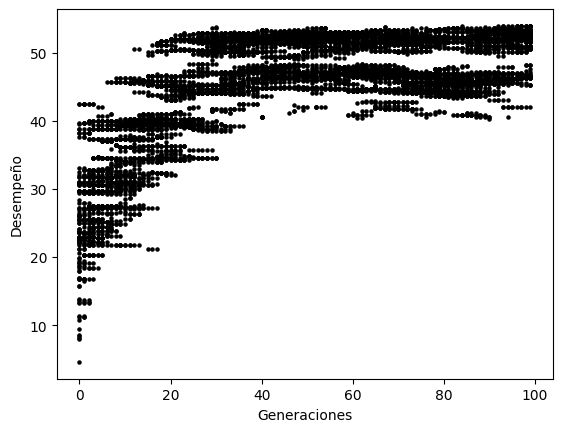

In [429]:
individuos=100
tasa1=30
tasa2=40
tasa3=30
puntos_totales=200
semilla=0.1
generaciones=100
Pmut=0.1
Pc=0.7
#------------------------------------------------------------------------------
generacion_actual=crear_generacion_0(individuos,puntos_totales,semilla)

desempeño_generaciones=[]
vector_numero_generacion=[]

for j in range(generaciones):

  iteraciones=j
  Desempeño_generacion_actual=np.array([FO_guerrero(ind) for ind in generacion_actual])

  Conjunto3=muestreo_universal(generacion_actual,Desempeño_generacion_actual,tasa3)
  Conjunto2=muestreo_universal(generacion_actual,Desempeño_generacion_actual,tasa2)
  Conjunto1=muestreo_universal(generacion_actual,Desempeño_generacion_actual,tasa1)



  longuitud_conjunto_1=len(Conjunto1)

  for i in range(longuitud_conjunto_1//2):
    if random.random() < Pc:
      Conjunto1[i],Conjunto1[(longuitud_conjunto_1//2)+i]=crossover_un_punto(Conjunto1[i],Conjunto1[(longuitud_conjunto_1//2)+i])



  Conjunto1= [mutacion_multigen(ind) for ind in Conjunto1]


  nueva_generacion = Conjunto1 + Conjunto2 + Conjunto3

  Desempeño_nueva_generacion=np.array([FO_guerrero(ind) for ind in nueva_generacion])


  desempeño_generaciones.append(Desempeño_nueva_generacion)

  vector = [iteraciones for _ in range(individuos)]

  vector_numero_generacion.append(vector)

  generacion_actual=copy.deepcopy(nueva_generacion)


for i in range(generaciones):

  plt.scatter(vector_numero_generacion[i],desempeño_generaciones[i],s=5, color='k')


#plt.title('Crossover Uniforme Pc=0.1')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')

plt.show()

In [419]:
A=generacion_actual[1]

A[0]=1.72
A[1]=70
A[2]=25
A[3]=10
A[4]=60
A[5]=45

print(FO_guerrero(A))
print(A)


26.534611432855996
[1.72, 70, 25, 10, 60, 45]


# Se crea el directorio y se ejecuta el programa

In [423]:
directorio_mutacion = {
    1: mutacion_gen,
    2: mutacion_multigen
}

directorio_crossover = {
    1: crossover_dos_puntos,
    2: crossover_un_punto,
    3:crossover_uniforme
}

directorio_muestreo = {
    1: muestreo_elite,
    2: muestreo_ruleta,
    3: muestreo_universal,
    4: muestreo_Boltzmann,
    5: muestreo_Ranking,
    6: torneo_deterministico,
    7: torneo_probabilistico
}

In [432]:
#Se crea la configuracion
configuracion = {
    'cantidad_individuos': 100,   # Número de individuos en la población
    'cantidad_generaciones': 100, # Número de generaciones
    'puntos_totales': 200,
    'semilla': 0.1,
    'Pmut': 0.0,         # Tasa de mutación
    'Pc': 0.0,        # Tasa de cruce
    'tasa1': 30,
    'tasa2': 40,
    'tasa3': 30,
    'tipo_crossover': 1,
    'tipo_mutacion': 2,
    'tipo_muestreo1': 3,
    'tipo_muestreo2': 3,
    'tipo_muestreo3':1
    }

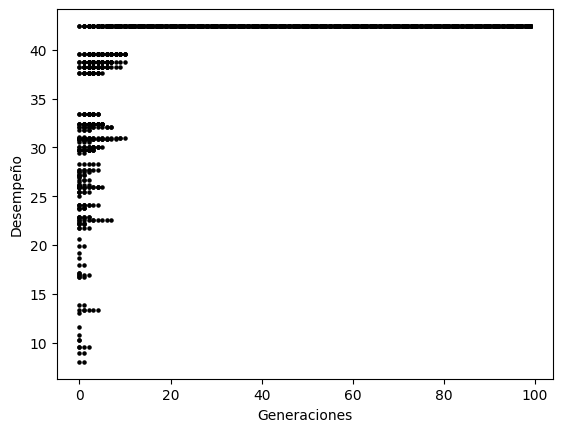

In [433]:
individuos=configuracion['cantidad_individuos']
tasa1=configuracion['tasa1']
tasa2=configuracion['tasa2']
tasa3=configuracion['tasa3']
puntos_totales=configuracion['puntos_totales']
semilla=configuracion['semilla']
generaciones=configuracion['cantidad_generaciones']
Pmut=configuracion['Pmut']
Pc=configuracion['Pc']
#------------------------------------------------------------------------------
generacion_actual=crear_generacion_0(individuos,puntos_totales,semilla)

desempeño_generaciones=[]
vector_numero_generacion=[]

for j in range(generaciones):

  iteraciones=j
  Desempeño_generacion_actual=np.array([FO_guerrero(ind) for ind in generacion_actual])

  Conjunto3=directorio_muestreo[configuracion['tipo_muestreo3']](generacion_actual,Desempeño_generacion_actual,tasa3)
  Conjunto2=directorio_muestreo[configuracion['tipo_muestreo2']](generacion_actual,Desempeño_generacion_actual,tasa2)
  Conjunto1=directorio_muestreo[configuracion['tipo_muestreo1']](generacion_actual,Desempeño_generacion_actual,tasa1)



  longuitud_conjunto_1=len(Conjunto1)

  for i in range(longuitud_conjunto_1//2):
    if random.random() < Pc:
      Conjunto1[i],Conjunto1[(longuitud_conjunto_1//2)+i]=directorio_crossover[configuracion['tipo_crossover']](Conjunto1[i],Conjunto1[(longuitud_conjunto_1//2)+i])



  Conjunto1= [directorio_mutacion[configuracion['tipo_mutacion']](ind) for ind in Conjunto1]


  nueva_generacion = Conjunto1 + Conjunto2 + Conjunto3

  Desempeño_nueva_generacion=np.array([FO_guerrero(ind) for ind in nueva_generacion])


  desempeño_generaciones.append(Desempeño_nueva_generacion)

  vector = [iteraciones for _ in range(individuos)]

  vector_numero_generacion.append(vector)

  generacion_actual=copy.deepcopy(nueva_generacion)


for i in range(generaciones):

  plt.scatter(vector_numero_generacion[i],desempeño_generaciones[i],s=5, color='k')


#plt.title('Crossover Uniforme Pc=0.1')
plt.xlabel('Generaciones')
plt.ylabel('Desempeño')

plt.show()